# **Feature Engineering**

Kenyataannya data tidak selalu `tidy` atau `clean`, data tidak bisa langsung di proses di sklearn, maka dilakukan `preprocessing data` fitur engineering. Mengubah data dari yang tadinya tidak bisa di proses menjadi data yang bisa di proses.

* Encoding Categorical Data

* Imputing Missing Value

* Feature Centering and Scaling

# **Encoding Categorical Data**

Encoding Categorical Data adalah mengubah data yang bertipe data kategori menjadi numerik. mengapa ? karena library ML di sklearn tidak dapat menerima data yang bertipe kategori.

Dalam memproses suatu dataset, kita harus memperhatikan jenis-jenis data agar tidak terjadi kesalahan proses.

Salah satu jenis data yang akan dibahas dalam artikel kali ini adalah: 

Categorical Data.

## **Get Dummies and Replace**

In [1]:
data = {
    'pendidikan_terakhir':['SD', 'SMP', 'SMA', 'SMP', 'SMP'],
    'tempat_tinggal':['Bandung', 'Garut', 'Bandung', 'Cirebon', 'Jakarta'],
    'status':['Menikah', 'Jomblo', 'Janda', 'Jomblo', 'Duda'],
    'tingkat_ekonomi':['Kurang Mampu', 'Berkecukupan', 'Mampu', 'Sangat Mampu', 'Mampu'],
    'jumlah_anak':[1, 4, 2, 0, 3]
}

In [2]:
import pandas as pd
df = pd.DataFrame(data)
df

,pendidikan_terakhir,tempat_tinggal,status,tingkat_ekonomi,jumlah_anak
0,SD,Bandung,Menikah,Kurang Mampu,1
1,SMP,Garut,Jomblo,Berkecukupan,4
2,SMA,Bandung,Janda,Mampu,2
3,SMP,Cirebon,Jomblo,Sangat Mampu,0
4,SMP,Jakarta,Duda,Mampu,3


Pada Data harus diperhatikan bahwa data kategori ada yang berupa tingkatan (order) dan tidak memiliki tingkatan (unorder) :

* Data Kategori tanpa tingkatan

    'status':['Menikah', 'Jomblo', 'Janda', 'Jomblo', 'Duda'],

    'tempat_tinggal':['Bandung', 'Garut', 'Bandung', 'Cirebon', 'Jakarta'],

    Contoh : (Bandung, Garut, Cirebon, Jakarta)

        * Bandung -> 1000
        * Garut -> 0100
        * Cirebon -> 0010
        * Jakarta -> 0001

* Data Kategori dengan tingkatan

    'pendidikan_terakhir':['SD', 'SMP', 'SMA', 'SMP', 'SMP'] 

    'tingkat_ekonomi':['Kurang Mampu', 'Berkecukupan', 'Mampu', 'Sangat Mampu', 'Mampu'],

    Contoh : (SD, SMP, SMA)

        * SD -> 0
        * SMP -> 1
        * SMA -> 2


* `.get_dummies()`
* `.replace()`

In [3]:
pd.get_dummies(df)

,jumlah_anak,pendidikan_terakhir_SD,pendidikan_terakhir_SMA,pendidikan_terakhir_SMP,tempat_tinggal_Bandung,tempat_tinggal_Cirebon,tempat_tinggal_Garut,tempat_tinggal_Jakarta,status_Duda,status_Janda,status_Jomblo,status_Menikah,tingkat_ekonomi_Berkecukupan,tingkat_ekonomi_Kurang Mampu,tingkat_ekonomi_Mampu,tingkat_ekonomi_Sangat Mampu
0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,4,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
2,2,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0


Karena pada pendidikan terakhir dan tingkat ekonomi merupakan data kategori yg tingkatan, dan bukan data kategori non tingkatan maka :

In [4]:
df = pd.get_dummies(df, columns=['tempat_tinggal', 'status']) # overwrite
df

,pendidikan_terakhir,tingkat_ekonomi,jumlah_anak,tempat_tinggal_Bandung,tempat_tinggal_Cirebon,tempat_tinggal_Garut,tempat_tinggal_Jakarta,status_Duda,status_Janda,status_Jomblo,status_Menikah
0,SD,Kurang Mampu,1,1,0,0,0,0,0,0,1
1,SMP,Berkecukupan,4,0,0,1,0,0,0,1,0
2,SMA,Mampu,2,1,0,0,0,0,1,0,0
3,SMP,Sangat Mampu,0,0,1,0,0,0,0,1,0
4,SMP,Mampu,3,0,0,0,1,1,0,0,0


Sedangkan untuk pendidikan terakhir dan tingkat ekonomi yang merupakan data kategori tingkatan, menggunakan replace()

In [5]:
obj_dict = {
    'Kurang Mampu':0,
    'Berkecukupan':1,
    'Mampu':2,
    'Sangat Mampu':3
}

# overwrite tingkat ekonomi

df['tingkat_ekonomi'] = df['tingkat_ekonomi'].replace(obj_dict)

In [6]:
obj_dict = {
    'SD':0,
    'SMP':1,
    'SMA':2,
}

# overwrite tingkat ekonomi

df['pendidikan_terakhir'] = df['pendidikan_terakhir'].replace(obj_dict)

In [7]:
df

,pendidikan_terakhir,tingkat_ekonomi,jumlah_anak,tempat_tinggal_Bandung,tempat_tinggal_Cirebon,tempat_tinggal_Garut,tempat_tinggal_Jakarta,status_Duda,status_Janda,status_Jomblo,status_Menikah
0,0,0,1,1,0,0,0,0,0,0,1
1,1,1,4,0,0,1,0,0,0,1,0
2,2,2,2,1,0,0,0,0,1,0,0
3,1,3,0,0,1,0,0,0,0,1,0
4,1,2,3,0,0,0,1,1,0,0,0


## **Label Encoder dan One Hot Encoder**

[link text](https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/)

[link text](https://medium.com/machine-learning-id/memproses-category-data-1515245c83e7)

In [8]:
import pandas as pd
dataset = pd.read_csv('https://drive.google.com/uc?id=1OKJ4ExUxp7d8lgnqUtB7B66HPix1WKLj')


dataset['Salary'] = dataset['Salary'].fillna(63777.78)
dataset['Age'] = dataset['Age'].fillna(38.77778)
dataset

,Country,Age,Salary,Purchased
0,France,44.00000,72000.00,No
1,Spain,27.00000,48000.00,Yes
2,Germany,30.00000,54000.00,No
3,Spain,38.00000,61000.00,No
4,Germany,40.00000,63777.78,Yes
5,France,35.00000,58000.00,Yes
6,Spain,38.77778,52000.00,No
7,France,48.00000,79000.00,Yes
8,Germany,50.00000,83000.00,No
9,France,37.00000,67000.00,Yes


Terlihat jelas bahwa Age dan Salary adalah jenis Numerical Data, sedangkan Country dan Purchased termasuk Categorical Data.

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
dataset['Country'] = label_encoder.fit_transform(dataset['Country'])
dataset

,Country,Age,Salary,Purchased
0,0,44.00000,72000.00,No
1,2,27.00000,48000.00,Yes
2,1,30.00000,54000.00,No
3,2,38.00000,61000.00,No
4,1,40.00000,63777.78,Yes
5,0,35.00000,58000.00,Yes
6,2,38.77778,52000.00,No
7,0,48.00000,79000.00,Yes
8,1,50.00000,83000.00,No
9,0,37.00000,67000.00,Yes


Perhatikan bahwa sekarang value dari kolom Country telah berubah:

* France = 0
* Spain = 1
* Germany = 2

Tentu, angka 0, 1, dan 2 ini seharusnya tidak membuat Germany lebih baik dari Spain, dan Spain lebih baik dari France bukan?

Itu sebabnya kita masih harus melakukan proses selanjutnya: 

***Dummy Encoding / One Hot Encoding***

![onehotencoding.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/onehotencoding.png)



In [10]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
#reshape the 1-D country array to 2-D as fit_transform expects 2-D and finally fit the object 
X = one_hot_encoder.fit_transform(dataset.Country.values.reshape(-1,1)).toarray()

#To add this back into the original dataframe 
dfOneHot = pd.DataFrame(X, columns=['France', 'Germany', 'Spain'], dtype=int) 
df_encod = pd.concat([dfOneHot, dataset], axis=1)
#droping the country column 
df_encod= df_encod.drop(['Country'], axis=1) 
#printing to verify 
df_encod

,France,Germany,Spain,Age,Salary,Purchased
0,1,0,0,44.00000,72000.00,No
1,0,0,1,27.00000,48000.00,Yes
2,0,1,0,30.00000,54000.00,No
3,0,0,1,38.00000,61000.00,No
4,0,1,0,40.00000,63777.78,Yes
5,1,0,0,35.00000,58000.00,Yes
6,0,0,1,38.77778,52000.00,No
7,1,0,0,48.00000,79000.00,Yes
8,0,1,0,50.00000,83000.00,No
9,1,0,0,37.00000,67000.00,Yes


Encode Colom Purchased

Seperti yang sudah dijelaskan diatas, ada 2 kolom yang jenisnya categorical data, yaitu Country dan Purchased.
Tambahkan kode berikut untuk meng-encode kolom Purchased:

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encod['Purchased'] = label_encoder.fit_transform(df_encod['Purchased'])
df_encod

,France,Germany,Spain,Age,Salary,Purchased
0,1,0,0,44.00000,72000.00,0
1,0,0,1,27.00000,48000.00,1
2,0,1,0,30.00000,54000.00,0
3,0,0,1,38.00000,61000.00,0
4,0,1,0,40.00000,63777.78,1
5,1,0,0,35.00000,58000.00,1
6,0,0,1,38.77778,52000.00,0
7,1,0,0,48.00000,79000.00,1
8,0,1,0,50.00000,83000.00,0
9,1,0,0,37.00000,67000.00,1


# **Missing Data**

[link text](https://mragungsetiaji.github.io/python/machine%20learning/2018/08/23/machine-learning-missing-value.html)

Missing data dalam dataset tentu akan membuat hasil analisa data menjadi kacau. 
Berikut adalah contoh missing data dalam dataset:

![missingdata.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/missingdata.png)

mengapa dengan missing value , karena apabila suatu model dengan data yang banyak missing value maka performa akan turun atau secara drastis.

Missing value -> pandas -> dinyatakan

* np.nan
* None
* -
* 0
* -99
* '  ' blank value

**Imputasi atau Delete Data**

Sebelum ke metode imputasi, kita harus memahami alasan mengapa data bisa missing.

1. Missing at Random (MAR): Missing secara random berarti bahwa kecenderungan untuk sebuah data point yang missing terkait dengan masalah saat observasinya, bukan terkait dengan datanya.

2. Missing Completly at Random (MCAR): Sebuah data point tertentu yang missing tidak ada hubungannya dengan hipotetis value atau data point pada variable yang berbeda.

3. Missing not a Random (MNAR): Dua alasan yang mungkin bahwa nilai yang missing tergantung pada hipotetis value (misalnya Orang dengan gaji tinggi umumnya tidak ingin mengungkapkan pendapatan mereka dalam sebuah survey) atau nilai yang missing tergantung pada beberapa nilai variabel lain (misalnya asumsi bahwa wanita umumnya tidak ingin mengungkapkan usia mereka, semakin tua dan belum menikah. Di sini, nilai yang missing dalam variabel usia dan pernikahan dipengaruhi oleh variabel jenis kelamin).

Dalam dua kasus pertama, aman kok menghapus data dengan nilai-nilai yang missing tergantung pada kemunculannya, sementara pada kasus ketiga menghapus pengamatan dengan nilai yang missing dapat menghasilkan bias dalam model. Jadi kita harus berhati-hati sebelum delete data observasi. Perhatikan bahwa imputasi tidak selalu memberikan hasil yang lebih baik.

![handlingmissingdata.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/handlingmissingdata.png)

Ada 5 cara dalam menghandle missing value :

1. Drop Missing Value -> jumlah missing value data banyak
2. Filling with Mean/Median -> berlaku untuk data yang bertipe numerik
3. Filling with Modus -> berlaku untuk data bertipe kategori
4. Filling with bffill atau ffill
5. KNN





## **Data**

In [12]:
import numpy as np

data = {
    'pendidikan_terakhir':[np.nan, 'SMP', 'SD', 'SMP', 'SMP', 'SD', 'SMP', 'SMA', 'SD'],
    'tingkat_ekonomi':[0, 1, 2, 3, 2, 2, 1, 1, 3],
    'jumlah_anak':[1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, 2]
}


In [13]:
import pandas as pd
df = pd.DataFrame(data)
df

,pendidikan_terakhir,tingkat_ekonomi,jumlah_anak
0,NaN,0,1.0
1,SMP,1,NaN
2,SD,2,NaN
3,SMP,3,NaN
4,SMP,2,NaN
5,SD,2,NaN
6,SMP,1,NaN
7,SMA,1,1.0
8,SD,3,2.0


## **Drop Missing Value**

Drop Missing Value dikarenakan jumlah missing value data banyak.

ada dua cara yaitu =

* `.dropna()`

    `dropna` -> akan mendrop semua kolom yang memiliki nilai n.nan walau hanya satu namun dropna harus berhati-hati

* `.drop()`

    sedangkan jika ingin mendrop jumlah anak yang banyak nan nya tanpa mendrop yg lain bisa menggunakan method `.drop()`

In [14]:
df.dropna(axis=1)

,tingkat_ekonomi
0,0
1,1
2,2
3,3
4,2
5,2
6,1
7,1
8,3


In [15]:
df.drop(['jumlah_anak'], axis=1)

,pendidikan_terakhir,tingkat_ekonomi
0,NaN,0
1,SMP,1
2,SD,2
3,SMP,3
4,SMP,2
5,SD,2
6,SMP,1
7,SMA,1
8,SD,3


## **Filling Missing Value**

* Filling with Mean/Median -> berlaku untuk data yang bertipe numerik

* Filling with Modus -> berlaku untuk data bertipe kategori

In [16]:
# filling with mean/median untuk data numerik
df['jumlah_anak'] = df['jumlah_anak'].fillna(df['jumlah_anak'].mean())
df['jumlah_anak'] = df['jumlah_anak'].astype(int)
df

,pendidikan_terakhir,tingkat_ekonomi,jumlah_anak
0,NaN,0,1
1,SMP,1,1
2,SD,2,1
3,SMP,3,1
4,SMP,2,1
5,SD,2,1
6,SMP,1,1
7,SMA,1,1
8,SD,3,2


In [17]:
# filling with modus untuk data kategori

# pertama mencari data terbanyak muncul 
df['pendidikan_terakhir'].value_counts() # didapatkan modus = 'SMP'

SMP    4
SD     3
SMA    1
Name: pendidikan_terakhir, dtype: int64

In [18]:
df['pendidikan_terakhir'] = df['pendidikan_terakhir'].fillna('SMP')
df

,pendidikan_terakhir,tingkat_ekonomi,jumlah_anak
0,SMP,0,1
1,SMP,1,1
2,SD,2,1
3,SMP,3,1
4,SMP,2,1
5,SD,2,1
6,SMP,1,1
7,SMA,1,1
8,SD,3,2



## **Filling with bffill atau ffill**
* ffill -> mengisi nilai nan dengan nilai sebelumnya
* bfill -> mengisi nilai nan dengan nilai didepannya

Untuk data Time Series

In [19]:
data_ts = { #Time Series = data yang memiliki order waktu
    'Hari':[1, 2, 3, 4, 5],
    'Jumlah':[12, 23, np.nan, 12, 10]
}

import pandas as pd
df_ts = pd.DataFrame(data_ts)
df_ts

,Hari,Jumlah
0,1,12.0
1,2,23.0
2,3,NaN
3,4,12.0
4,5,10.0


In [20]:
df_ts.fillna(method='ffill')

,Hari,Jumlah
0,1,12.0
1,2,23.0
2,3,23.0
3,4,12.0
4,5,10.0


In [21]:
df_ts.fillna(method='bfill')

,Hari,Jumlah
0,1,12.0
1,2,23.0
2,3,12.0
3,4,12.0
4,5,10.0


## **KNN**

In [22]:
import numpy as np

data = {
    'pendidikan_terakhir':[np.nan, 'SMP', 'SD', 'SMP', 'SMP', 'SD', 'SMP', 'SMA', 'SD'],
    'tingkat_ekonomi':[0, 1, 2, 3, 2, 2, 1, 1, 3],
    'jumlah_anak':[1, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 1, 2]
}


In [23]:
import pandas as pd
df = pd.DataFrame(data)
df

,pendidikan_terakhir,tingkat_ekonomi,jumlah_anak
0,NaN,0,1.0
1,SMP,1,NaN
2,SD,2,NaN
3,SMP,3,NaN
4,SMP,2,NaN
5,SD,2,NaN
6,SMP,1,NaN
7,SMA,1,1.0
8,SD,3,2.0


In [24]:
from sklearn.impute import KNNImputer
imp = KNNImputer(n_neighbors=5)
# imp.fit_transform(df) could not convert string to float: 'SMP'
# imp.fit_transform(df['jumlah_anak']) Expected 2D array, got 1D array instead
# imp.fit_transform(df['jumlah_anak'][:, np.newaxis]) nanti tidak masuk ke dalam hitungan mengurangi akurasi imputan
imp.fit_transform(df[['jumlah_anak', 'tingkat_ekonomi']])

array([[1.        , 0.        ],
       [1.33333333, 1.        ],
       [1.33333333, 2.        ],
       [1.33333333, 3.        ],
       [1.33333333, 2.        ],
       [1.33333333, 2.        ],
       [1.33333333, 1.        ],
       [1.        , 1.        ],
       [2.        , 3.        ]])

## **SimpleImputer**

In [25]:
import pandas as pd
dataset = pd.read_csv('https://drive.google.com/uc?id=1OKJ4ExUxp7d8lgnqUtB7B66HPix1WKLj')

dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


# **Feature Centering and Scaling**

mengubah distribusi data, knp ? karena banyak dari algotima di ML pada sklearn 'distance based' maksudnya dalam algoritma ada kalkulasi jarak antar data point.

Kenapa ?

In [26]:
import pandas as pd
import numpy as np

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)
df = pd.read_csv('https://drive.google.com/uc?id=1HtA3MOLvgDogWvqLjv6ZBpf3oONL4WLW', names=colnames)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


dari contoh ini melalui deskripsi statistik, ini masing masing memiliki skala yang berbeda beda. 

std nya juga berbeda beda, kolom prediksi std yang besar memiliki impact yang besar dalam pembangunan arsitektur model. begitupun sebaliknya std yang kecil.

Kita mau semua kolom prediktor (preg, plas, pres, skin, test, mass, pedi, age, kecuali class) pada awalnya memiliki std yang sama influence besar.

Oleh karena itu kita harus melakukan scaling dan centering.

Adapun Jenis - Jenis Scaling :

* Standarization -> Umum digunakan
* Normalization -> Umum digunakan
* Mean Max Scaling
* Unit Vector

## **Standardization**

[link text](https://medium.com/@joelvarmadirisam/my-take-on-why-do-we-need-to-standardize-the-data-1459e6608a63)

melakukan centering dan scaling dimana semua kolom prediktor memiliki rata2 di nol

![standardization.jpeg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/standardization.jpeg)

Rumus

![standardization_rumus.png](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/standardization_rumus.png)

Centering -> Meannya menjadi 0

Scaling -> Standard Deviasi 1



In [28]:
import pandas as pd
import numpy as np

colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
# df = pd.read_csv('pima-indians-diabetes.csv', names=colnames)
df = pd.read_csv('https://drive.google.com/uc?id=1HtA3MOLvgDogWvqLjv6ZBpf3oONL4WLW', names=colnames)

df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
X = df.drop('class', axis=1)
X.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [30]:
from sklearn.preprocessing import StandardScaler
stdscalar = StandardScaler()
datascale = stdscalar.fit_transform(X) 

In [31]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df = pd.DataFrame(datascale, columns=colnames)
df

,preg,plas,pres,skin,test,mass,pedi,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [32]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


Contoh 2

In [33]:
# Standardize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the Iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data and target attributes
X = iris.data
y = iris.target
# standardize the data attributes
standardized_X = preprocessing.scale(X)

(150, 4)


## **Normalization**

adalah melakukan centering dan scaling dimana data mempunyai nilai maksimum 1 dan nilai minimum -1

![normalization01.jpg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/normalization01.jpg)

![normalization02.jpg](https://raw.githubusercontent.com/nurimammasri/Wooky-Machine-Learning/main/Images/normalization02.jpg)

x normalized = (x – x minimum) / (x maximum – x minimum)

Mean Normalization

mempunyai nilai maksimum 1 dan nilai minimum -1 dan Mean = 0





In [34]:
from sklearn.preprocessing import Normalizer
normscalar = Normalizer()
datanorm = normscalar.fit_transform(X)


In [35]:
# colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
# df = pd.DataFrame(datanorm, columns=colnames)
# df

In [36]:
df.describe()

,preg,plas,pres,skin,test,mass,pedi,age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,2.544261e-17,3.614007e-18,-1.327244e-17,7.994184e-17,-3.556183e-17,2.295979e-16,2.398978e-16,1.857600e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


Contoh 2

In [37]:
# Normalize the data attributes for the Iris dataset.
from sklearn.datasets import load_iris
from sklearn import preprocessing
# load the iris dataset
iris = load_iris()
print(iris.data.shape)
# separate the data from the target attributes
X = iris.data
y = iris.target

# normalize the data attributes
normalized_X = preprocessing.normalize(X)

(150, 4)


Source Lengkap :

https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/

https://medium.com/machine-learning-id/melakukan-feature-scaling-pada-dataset-229531bb08de

https://medium.com/warung-pintar/beberapa-cara-untuk-preprocessing-data-dalam-machine-learning-13cef4294614

https://pythonprogramming.net/preprocessing-machine-learning/

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

Normalization

kita tidak tahu bahwa kita tidak harus memiliki asumsi bahwa data kita memiliki distribusi normal dan kita memakai algoritma ML yang tidak harus mengasumsikan bentuk distribusi dari data

contohnya KNN, Neural Network dll


Standardization

apabila data kita berasumsi memiliki distribusi normal

# **Task**

<h1>Quiz 1 : Pemahaman</h1>

1. Sebutkan apa saja kira2 preprocessing Data?
2. Jelaskan beberapa cara imputing missing value?
3. Kapan kita perlu melakukan feature centering dan scaling?
4. Bagaimana Data Science Workflow?

1. a. standard and normalization

   b. impute missing value 

   c. inconsistent value

   d. duplicate value
   
   e. aggregating data
   
   f. pengurangan dimensi
   
   g. encoding fitur

2. a. drop missing value
   
   b. fill with median/mean
   
   c. fill with modus
   
   d. fill with bfill, ffill
   
   e. knn
   
3. centering dan scaling berupa normalization dan standarization

    normalisasi dilakukan ketika kita tidak mengetahui dan mengasumsikan data sebagai distribusi normal dan menggunakan ML yang tidak megasumsikan datanya sebagai dist normal

    standardisasi dilakukan ketika kita tahu bahwa data yang digunakan merupakan distirbusi normal sehingga kita dapat  menggunakan macam macam tipe regresi
    
4. 

    * mining data from data source untuk mengambil data dari berbagai sumber
   
    * processing data dengan EDA (exploratory data analysis) dan feature engineering
    
    * modelling data with machine learning
    
    * deploy model untuk memprediksi data baru

    * monitor model sehingga selalu memberikan performa yang baik

<h1>Quiz 2 : Pengaplikasian</h1>

Selamat, sampai tahap ini kalian telah belajar banyak tentang data science, dari mulai python, data manipulasi, visualisasi, dan pembuatan model. Sekarang saatnya untuk mengaplikasikan semuanya.

Download dan gunakan data titanic.csv sebagai data untuk pembuatan model ML. Pahami betul data ini dengan melakukan EDA (Explolatory Data Analaysis), Visualisasi, Data Analysis, Preprocessing Data, dan Modeling.

<b>(Optional)</b> Download dan gunakan data titanic_test.csv untuk mengetest model kalian dengan melakukan prediksi terhadap data tersebut. Submit hasil prediksinya ke kaggle dan lihat scorenya. https://www.kaggle.com/c/titanic/submit


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

train=pd.read_csv('https://drive.google.com/uc?id=1XFnAOE4w8KhfgAdfGLHuau0AbKNQz6mA')
test=pd.read_csv('https://drive.google.com/uc?id=1Z5rqTdRmjVYQpod0_hgNqMs5EdzZ5U2C')



In [39]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin dan Embarked ada NaN

Karena Cabin banyak memiliki nilai NaN maka di drop 

Untuk Age dan Embarked akan di fillna.

untuk kolong PassengerID, Name, dan Ticket itu tidak digunakan karena tidak ada hubungannya dengan masalah.

In [42]:
train.loc[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [43]:
train['Age']=train['Age'].fillna(train['Age'].mean())

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
train.loc[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [46]:
train['Embarked'].mode()[0] #karena modus S maka data hilang akan diganti S

'S'

In [47]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
traina = train[train.columns.drop(['Cabin'])]
x_train = traina[traina.columns.drop(['Survived', 'PassengerId', 'Name', 'Ticket'])]
y_train = traina['Survived']

In [50]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [51]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


Karena pada Sex dan Embarked merupakan data categorical nonordinal maka harus di ubah ke kolom nonordinal

In [52]:
x_train = pd.get_dummies(x_train)
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0
2,3,26.000000,0,0,7.9250,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1
4,3,35.000000,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,1,0,0,1
887,1,19.000000,0,0,30.0000,1,0,0,0,1
888,3,29.699118,1,2,23.4500,1,0,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0


In [53]:
x_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.188552,0.086420,0.725028
std,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.391372,0.281141,0.446751
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


Dilihat dari Statistic Description nya dilihat bahwa nilai std tiap colom predictor nya berbeda beda bahkan agak jauh berbeda. Maka akan dilakukan Scaling dan Centering

In [54]:
stdscal = StandardScaler()
scale = stdscal.fit_transform(x_train)

In [55]:
x_train = pd.DataFrame(scale, columns=list(x_train.columns.values))
x_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.827377,-0.592481,0.432793,-0.473674,-0.502445,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.638789,0.432793,-0.473674,0.786845,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.407926,0.432793,-0.473674,0.420730,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.407926,-0.474545,-0.473674,-0.486337,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,0.000000,0.432793,2.008933,-0.176263,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,-0.737695,0.737695,2.074505,-0.307562,-1.623803


In [56]:
x_train.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-2.031048e-16,2.562796e-16,3.456519e-16,6.716164e-17,-4.373606e-17,3.162453e-16,-4.059603e-16,1.167541e-16,-4.017238e-16,-2.093350e-16
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.566107e+00,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
25%,-3.693648e-01,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01,-7.376951e-01,-1.355574e+00,-4.820427e-01,-3.075623e-01,-1.623803e+00
50%,8.273772e-01,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01,-7.376951e-01,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
75%,8.273772e-01,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02,1.355574e+00,7.376951e-01,-4.820427e-01,-3.075623e-01,6.158384e-01
max,8.273772e-01,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00,1.355574e+00,7.376951e-01,2.074505e+00,3.251373e+00,6.158384e-01


In [57]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [58]:
test.info() # null Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age, Fare, Cabin  ada NaN

Karena Cabin banyak memiliki nilai NaN maka di drop 

Untuk Fare akan di fillna.

untuk kolong PassengerID, Name, dan Ticket itu tidak digunakan karena tidak ada hubungannya dengan masalah.

In [59]:
test.loc[test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [60]:
test['Age']=test['Age'].fillna(test['Age'].mean())

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [62]:
test.loc[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [63]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())

In [64]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [65]:
testna = test[test.columns.drop(['Cabin'])]
x_test = testna[testna.columns.drop(['PassengerId', 'Name', 'Ticket'])]

x_test = pd.get_dummies(x_test)

stdscal = StandardScaler()
scale = stdscal.fit_transform(x_test)

x_test = pd.DataFrame(scale, columns=list(x_test.columns.values))
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.873482,0.334993,-0.499470,-0.400248,-0.498407,-0.755929,0.755929,-0.568142,2.843757,-1.350676
1,0.873482,1.325530,0.616992,-0.400248,-0.513274,1.322876,-1.322876,-0.568142,-0.351647,0.740370
2,-0.315819,2.514175,-0.499470,-0.400248,-0.465088,-0.755929,0.755929,-0.568142,2.843757,-1.350676
3,0.873482,-0.259330,-0.499470,-0.400248,-0.483466,-0.755929,0.755929,-0.568142,-0.351647,0.740370
4,0.873482,-0.655545,0.616992,0.619896,-0.418471,1.322876,-1.322876,-0.568142,-0.351647,0.740370
...,...,...,...,...,...,...,...,...,...,...
413,0.873482,0.000000,-0.499470,-0.400248,-0.494448,-0.755929,0.755929,-0.568142,-0.351647,0.740370
414,-1.505120,0.691586,-0.499470,-0.400248,1.313753,1.322876,-1.322876,1.760125,-0.351647,-1.350676
415,0.873482,0.651965,-0.499470,-0.400248,-0.508792,-0.755929,0.755929,-0.568142,-0.351647,0.740370
416,0.873482,0.000000,-0.499470,-0.400248,-0.494448,-0.755929,0.755929,-0.568142,-0.351647,0.740370


In [66]:
x_test.describe()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02,4.180000e+02
mean,-2.018587e-17,1.328018e-17,-1.593622e-17,-1.407699e-16,-2.808758e-17,-1.859225e-17,1.859225e-17,-9.667971e-17,-1.407699e-17,-1.593622e-16
std,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00,1.001198e+00
min,-1.505120e+00,-2.385419e+00,-4.994700e-01,-4.002477e-01,-6.387815e-01,-7.559289e-01,-1.322876e+00,-5.681415e-01,-3.516474e-01,-1.350676e+00
25%,-1.505120e+00,-5.763018e-01,-4.994700e-01,-4.002477e-01,-4.972129e-01,-7.559289e-01,-1.322876e+00,-5.681415e-01,-3.516474e-01,-1.350676e+00
50%,8.734819e-01,0.000000e+00,-4.994700e-01,-4.002477e-01,-3.796234e-01,-7.559289e-01,7.559289e-01,-5.681415e-01,-3.516474e-01,7.403703e-01
75%,8.734819e-01,4.340463e-01,6.169924e-01,-4.002477e-01,-7.399887e-02,1.322876e+00,7.559289e-01,-5.681415e-01,-3.516474e-01,7.403703e-01
max,8.734819e-01,3.623577e+00,8.432229e+00,8.781044e+00,8.547081e+00,1.322876e+00,7.559289e-01,1.760125e+00,2.843757e+00,7.403703e-01


Membuat Model

Sebelum kita mebuat model, harus melakukan tuning hyperparameter dulu, untuk menentuka setting  model yang baik.

In [67]:
mod = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1,200), 'metric':['euclidean', 'manhattan', 'minkowski'], 'weights':['distance', 'uniform']}
gscv = GridSearchCV(mod, param_grid=params, cv=5, scoring='accuracy')
gscv.fit(x_train, y_train.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23...
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 188, 189

In [68]:
gscv.best_params_

{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}

In [69]:
gscv.best_score_

0.8215366267026551

In [70]:
model = KNeighborsClassifier(metric='manhattan', n_neighbors=12, weights='uniform')
model.fit(x_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [71]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [72]:
prediksi=testna
prediksi['Survived'] = y_pred # masukan hasil prediksi model fitting
prediksi

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S,0


In [73]:
prediksi.Survived.value_counts()

0    287
1    131
Name: Survived, dtype: int64

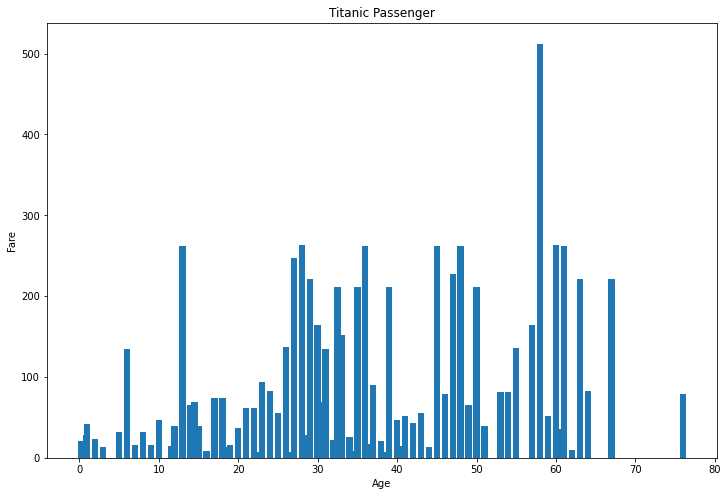

In [74]:
import matplotlib.pyplot as plt
X_plt=prediksi['Age']
y_plt=prediksi['Fare']
fig,ax=plt.subplots(figsize=(12,8))
ax.bar(X_plt,y_plt)
ax.set_title('Titanic Passenger')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
plt.show()

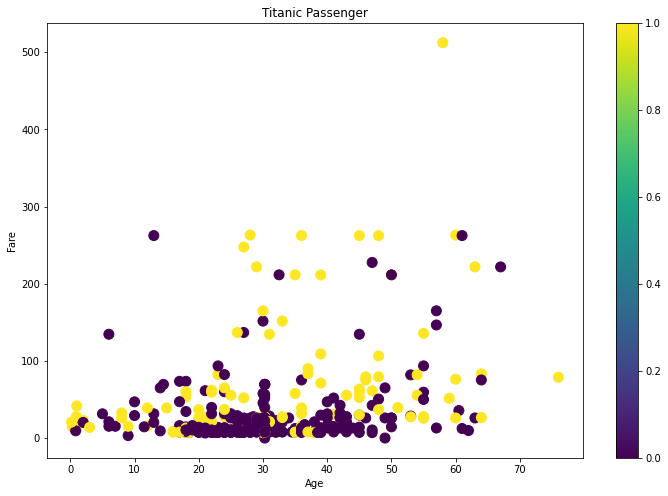

In [75]:
X_plt=prediksi['Age']
y_plt=prediksi['Fare']
fig,ax=plt.subplots(figsize=(12,8))
sctr=ax.scatter(X_plt,y_plt,c=prediksi['Survived'],s=100)
ax.set_title('Titanic Passenger')
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
fig.colorbar(sctr)
plt.show()

In [76]:
prediksi[['PassengerId', 'Survived']].to_csv('submission.csv', index=False)

In [77]:
prediksi.shape

(418, 11)